## Import Necessary Packages

In [1]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
week_days=set(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
clean_data={}
index=-1

In [3]:
# Parse log file
log_file=urllib.request.urlopen('https://raw.githubusercontent.com/kaazima/Internet-Analysis-Project/master/statistics.log')
for line in log_file:
  unclean_data=line.decode("utf-8")
  if unclean_data[:3] in week_days:
    index+=1
    clean_data[index]={}
    clean_data[index]['Day']=unclean_data[:3]
    time=unclean_data.split()[3].split(':')
    clean_data[index]['Hour']=int(time[0])
    clean_data[index]['Min']=time[1]
  else:
    unclean_data=unclean_data.split(':')
    prop=unclean_data[0].strip()
    remain=unclean_data[1].strip()
    if prop=='Server':
      clean_data[index][prop]=remain.split('(')[0].strip()
    elif prop=='Latency' and remain!='FAILED':
      remain=remain.split('(')
      clean_data[index][prop]=float(remain[0].strip().split()[0])
      clean_data[index]['Jitter']=float(remain[1].split()[0])
    elif (prop=='Download' or prop=='Upload') and remain!='FAILED':
      clean_data[index][prop]=float(remain.split()[0])
    elif prop=='Packet Loss' and remain!='Not available.':
      clean_data[index][prop]=float(remain.split('%')[0])

## Generate a DataFrame that contains Cleansed Data

In [4]:
# Convert dictionary to pandas dataframe
data=pd.DataFrame.from_dict(clean_data,orient ='index')

In [5]:
data.head(7)

Day  Hour Min  ... Download  Upload  Packet Loss
0  Tue    12  38  ...     6.63    1.41          NaN
1  Tue    12  40  ...     5.50    1.36          NaN
2  Tue    12  42  ...     5.39    1.70          NaN
3  Tue    12  44  ...     3.24    1.05          0.0
4  Tue    12  46  ...      NaN     NaN          NaN
5  Tue    12  48  ...     7.99     NaN          NaN
6  Tue    12  50  ...     5.58    1.33          0.0

[7 rows x 9 columns]

## Most Connected Server

In [6]:
print('Number of times each server is connected is as follows:\n')
data['Server'].value_counts()

Number of times each server is connected is as follows:



Airtel Broadband - Chennai                           697
Airconnect Fibernet - Chennai                        563
Airgenie - Chennai                                   510
TataSky Broadband Private Limited - Chennai          406
ACT Fibernet - Chennai                               399
Shyam Spectra - Chennai                              399
Sri Vari Network Private Limited - Chennai           391
Cherrinet - K Net Solutions Pvt Ltd - Chennai        375
Jio - Chennai                                        329
Pulse Telesystems - Chennai                           41
Vi India - Chennai                                    34
Arjuntelecom - Chennai                                25
TATASky Broadband Pvt Ltd - Bangalore                  4
Surround Networks Pvt Ltd. - Bengaluru                 3
JIFFY CABLE AND DATACOM - Bangalore                    3
North East Dataa Network Pvt Ltd - Bangalore           2
Airtel Broadband - Bangalore                           2
I-ON - Bengaluru               

*   The most connected server is **Airtel Broadband - Chennai**



## Analysis of Network Outages

In [7]:
day_outages={}
hour_outages={}

In [8]:
# Initialise the number of outages for each day to "0"
for day in week_days:
  day_outages[day]=0
# Initialise the number of outages for each hour to "0"
for hour in range(24):
  hour_outages[hour]=0

In [9]:
# Count the number of outages for each day, and for each hour
for index in range(len(data)):
  if data.loc[index].isna().sum()==6:
    day_outages[data.loc[index]['Day']]+=1
    hour_outages[data.loc[index]['Hour']]+=1

##### Plot Network Outages on each day

In [10]:
# Sort day_outages in descending order
# Here, lambda function accepts a key-value pair as an argument and returns the value field from that pair
print(sorted(day_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (day,no of outages)

[('Tue', 197), ('Sat', 172), ('Wed', 154), ('Fri', 109), ('Mon', 44), ('Sun', 4), ('Thu', 0)]


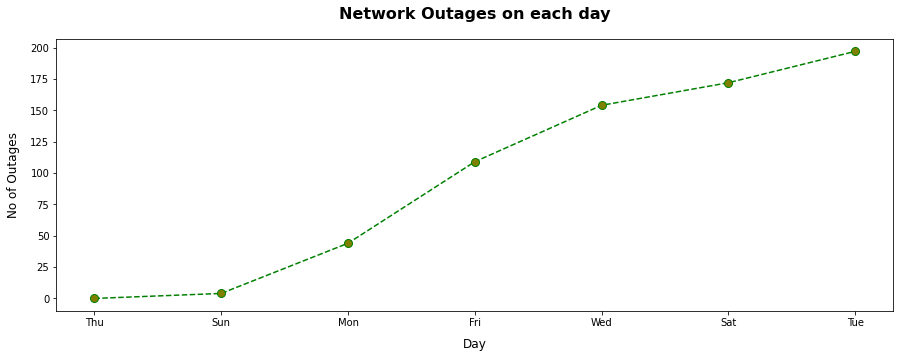

In [11]:
fig = plt.figure(figsize =(15, 5)) 
# Sort day_outages in ascending order
day,day_outage = zip(*sorted(day_outages.items(),key=lambda item:item[1]))
# Plotting the no of outages on each day
plt.plot(day, day_outage, color='green', linestyle='dashed', linewidth = 1.5, marker='o', markerfacecolor='olive', markersize=8)
# Naming the x and y axes
plt.xlabel('Day',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages on each day',pad=20,fontweight='bold',fontsize=16)
plt.show()



*   **Tuesday** had the most network outages
*   **Thursday** had the least network outages

##### Plot Network Outages for each hour

In [12]:
# Sort hour_outages in descending order
print(sorted(hour_outages.items(),key=lambda item:item[1],reverse=True))
# List of tuples, where each tuple corresponds to (hour,no of outages)

[(8, 127), (6, 121), (5, 120), (7, 120), (4, 104), (9, 36), (14, 25), (3, 14), (13, 4), (10, 2), (21, 2), (12, 1), (15, 1), (17, 1), (19, 1), (22, 1), (0, 0), (1, 0), (2, 0), (11, 0), (16, 0), (18, 0), (20, 0), (23, 0)]


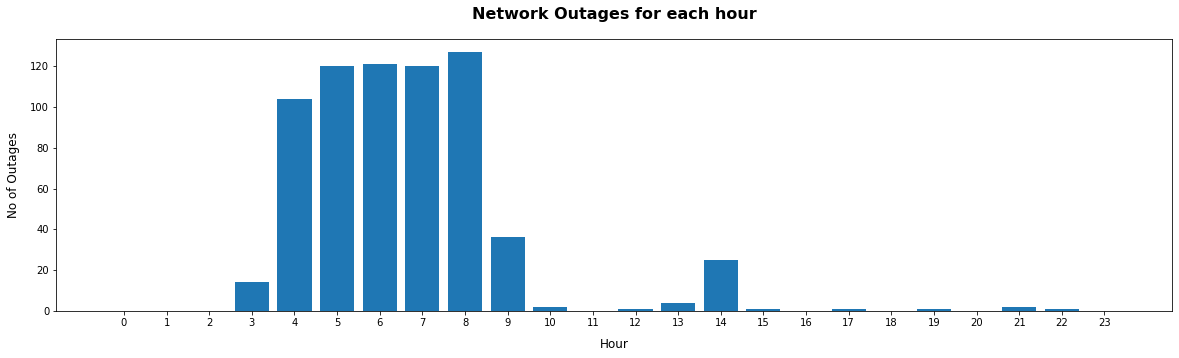

In [13]:
fig = plt.figure(figsize =(20, 5)) 
plt.bar(hour_outages.keys(), hour_outages.values())
plt.xticks(range(24))
plt.xlabel('Hour',labelpad=10,fontsize='large')
plt.ylabel('No of Outages',labelpad=10,fontsize='large')
plt.title('Network Outages for each hour',pad=20,fontweight='bold',fontsize=16)
plt.show()


*   **08:00** had the most network outages
*   **00:00, 01:00, 02:00, 11:00, 16:00, 18:00, 20:00, 23:00** had the least network outages

## Analysis of Days

In [14]:
day_analytics=data.groupby('Day').agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'], 'mean'))
display(day_analytics)

Latency     Jitter  Download    Upload  Packet Loss
Day                                                       
Fri  52.961620  20.997136  8.004036  2.756242     0.470609
Mon  58.219631  23.128190  7.660689  2.515389     0.611200
Sat  55.748619  20.791786  6.527937  2.548120     0.461600
Sun  52.356850  23.817102  9.675877  2.759493     0.525000
Thu  49.666064  21.427622  8.140542  2.465850     0.419512
Tue  59.416636  19.883309  6.998529  2.528876     0.457384
Wed  52.353893  23.741643  7.022612  2.381009     0.553361

In [15]:
display(pd.DataFrame({'Minimum':day_analytics.idxmin(),'Maximum':day_analytics.idxmax()}))

Minimum Maximum
Latency         Thu     Tue
Jitter          Tue     Sun
Download        Sat     Sun
Upload          Wed     Sun
Packet Loss     Thu     Mon

## Analysis of Hours

In [16]:
hour_analytics=data.groupby('Hour').agg(dict.fromkeys(['Latency','Jitter','Download','Upload','Packet Loss'], 'mean'))
display(hour_analytics)

Latency     Jitter   Download    Upload  Packet Loss
Hour                                                        
0     46.955333  20.731524   9.157788  3.968164     0.249412
1     44.729619  21.570000  12.671238  4.441714     0.443750
2     45.661095  21.347857  16.493238  4.926286     0.434783
3     45.897755  21.215459  18.220000  4.883246     0.629487
4     46.044848  18.794343  19.402396  4.650000     0.411364
5     48.496667  20.708167  17.677500  3.759667     0.508696
6     45.156034  21.433966  12.905690  3.888793     0.068421
7     47.503051  21.302203  10.699153  3.275254     1.296000
8     44.804933  27.014400   8.212000  2.800933     0.118750
9     65.380621  22.931429   6.724750  2.055597     0.612000
10    59.022383  23.952850   6.219895  1.665211     0.385714
11    62.807619  26.976571   5.536746  1.776912     0.468132
12    56.899087  21.805982   5.694110  1.993211     0.933696
13    59.094074  25.005648   4.998698  1.952279     0.485437
14    53.412295  18.288142   5.465110  1.773799     0.230233
15    58.612488  22.403923   6.199808  1.818454     0.596471
16    50.994545  19.825024   5.990287  2.131298     0.346939
17    56.522392  23.160048   5.962404  1.936058     0.443878
18    57.942722  18.874000   5.587640  1.703989     0.738824
19    58.686077  19.902320   4.306556  1.709609     0.675949
20    59.575000  23.618606   4.969952  1.468195     0.624468
21    56.465625  19.137260   4.263092  1.492864     0.808247
22    58.492788  19.065577   3.598413  1.749519     0.323000
23    48.017333  27.329905   4.632762  2.970429     0.119388

In [22]:
display(pd.DataFrame({'Minimum at':hour_analytics.idxmin(),'Maximum at':hour_analytics.idxmax()}))

Minimum at  Maximum at
Latency               1           9
Jitter               14          23
Download             22           4
Upload               20           2
Packet Loss           6           7